## Import the required Libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import os
import cv2
from scipy.signal import find_peaks
from scipy.stats import entropy
import joblib

In [ ]:
# Load the dataset
data = np.load(r'D:\project\SIH\SAMPLE\data_SAAB_SIRS_77GHz_FMCW.npy', allow_pickle=True)

# Extract the class labels (assuming they are in the first column)
class_labels = data[:, 0]  # Assuming the first column contains class labels

# Extract the second column containing complex data
complex_data = data[:, 1]  # Assuming column index 1 contains the complex data

# Initialize an empty list to hold the rows for the DataFrame
rows = []

# Loop through each row of the complex data
for i, array_2d in enumerate(complex_data):
    # Get the class label for the current row
    current_label = class_labels[i]
    
    # Iterate through each column in the 2D array
    for col in range(array_2d.shape[1]):  # Assuming array_2d is a 2D array
        # Extract the current column (column vector)
        complex_column = array_2d[:, col].reshape(1, -1)  # Reshape to (1, 1280)

        # Append a new row to the list with the class label and the complex column
        rows.append({'class_label': current_label, 'complex_numbers': complex_column})

# Create a DataFrame from the rows
df = pd.DataFrame(rows)

# Display the first row of the DataFrame
print("First row's shape of complex_numbers:", df.iloc[0]['complex_numbers'].shape)


First row's shape of complex_numbers: (1, 1280)


In [4]:
df.head()

,class_label,complex_numbers
0,[D1],"[[(-0.0803837295206183-0.024996274181930858j),..."
1,[D1],"[[(0.04756861314089348+0.036492234534479175j),..."
2,[D1],[[(-0.027591773267684104-0.05794827896575583j)...
3,[D1],"[[(-0.14233239675643977+0.10681103665375712j),..."
4,[D1],[[(-0.048216230187804125-0.03687242038373287j)...


In [5]:
# Flatten or extract scalar values from 'class_label' if they are stored as arrays
df['class_label'] = df['class_label'].apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)

# Now apply the filtering operation
labels_to_remove = ["CR", "human_walk", "human_run"]
filtered_df = df.loc[~df['class_label'].isin(labels_to_remove)]

# Display the resulting DataFrame
print(filtered_df.tail())


      class_label                                    complex_numbers
72583       heron  [[(-0.21817531280799585+0.1694670741011947j), ...
72584       heron  [[(-0.014823518033674127-0.05430279515732569j)...
72585       heron  [[(0.0008265612961672411+0.22773391056300446j)...
72586       heron  [[(0.11548737669984077+0.1380170343597902j), (...
72587       heron  [[(0.31726214282828247+0.1709665916002336j), (...


In [55]:
print(filtered_df.tail())

      class_label                                    complex_numbers
72583       heron  [[(-0.21817531280799585+0.1694670741011947j), ...
72584       heron  [[(-0.014823518033674127-0.05430279515732569j)...
72585       heron  [[(0.0008265612961672411+0.22773391056300446j)...
72586       heron  [[(0.11548737669984077+0.1380170343597902j), (...
72587       heron  [[(0.31726214282828247+0.1709665916002336j), (...


In [56]:
filtered_df['complex_numbers'][72587][0]

array([ 0.31726214+0.17096659j, -0.2112586 +0.13946245j,
        0.17284609-0.0178643j , ...,  0.10927199-0.12985478j,
        0.03183294+0.32986964j, -0.05223256+0.03647986j])

In [ ]:
# Extract the specific value of complex_numbers for index 72587
specific_array = filtered_df['complex_numbers'][7794][0]

# Define the file path for saving the CSV
csv_filename = r"D:\project\SIH\SAMPLE\CWT_Images\spectrogram_features_bird.csv"

# Convert the complex numbers to strings
specific_array_as_str = [str(complex_num) for complex_num in specific_array]

# Create a DataFrame to store the array elements as strings
df_to_save = pd.DataFrame(specific_array_as_str, columns=["bird_complex_number"])

# Save the DataFrame to a CSV file
df_to_save.to_csv(csv_filename, index=False)

print(f"Values with index 72587 saved to {csv_filename}")

Values with index 72587 saved to D:\project\SIH\SAMPLE\CWT_Images\spectrogram_features_bird.csv


In [ ]:
# Extract the specific value of complex_numbers for index 72587
specific_array = filtered_df['complex_numbers'][1][0]

# Define the file path for saving the CSV
csv_filename = r"D:\project\SIH\SAMPLE\CWT_Images\spectrogram_features_drone.csv"

# Convert the complex numbers to strings
specific_array_as_str = [str(complex_num) for complex_num in specific_array]

# Create a DataFrame to store the array elements as strings
df_to_save = pd.DataFrame(specific_array_as_str, columns=["drone_complex_number"])

# Save the DataFrame to a CSV file
df_to_save.to_csv(csv_filename, index=False)

print(f"Values with index 0 saved to {csv_filename}")


Values with index 0 saved to D:\project\SIH\SAMPLE\CWT_Images\spectrogram_features_drone.csv


In [6]:
# Define a mapping dictionary for class labels
label_mapping = {
    "D1": "Drone",
    "D2": "Drone",
    "D3": "Drone",
    "D4": "Drone",
    "D5": "Drone",
    "D6": "Drone",
    "heron": "Bird",
    "seagull": "Bird",
    "black-headed gull": "Bird",
    "seagull and black-headed gull": "Bird",
    "pigeon": "Bird",
    "raven": "Bird",
}

# Replace the class labels using the mapping with .loc to avoid the warning
filtered_df.loc[:, 'class_label'] = filtered_df['class_label'].replace(label_mapping)

# Display the updated DataFrame
print(filtered_df.tail())


      class_label                                    complex_numbers
72583        Bird  [[(-0.21817531280799585+0.1694670741011947j), ...
72584        Bird  [[(-0.014823518033674127-0.05430279515732569j)...
72585        Bird  [[(0.0008265612961672411+0.22773391056300446j)...
72586        Bird  [[(0.11548737669984077+0.1380170343597902j), (...
72587        Bird  [[(0.31726214282828247+0.1709665916002336j), (...


In [7]:
with open(r'D:\project\SIH\SAMPLE\drone_bird_dataset.csv', 'w') as file:
    file.write(filtered_df.to_csv())

In [8]:
c_v = filtered_df['complex_numbers']

In [10]:
# Convert the 'complex_numbers' column to a list of numpy arrays (1D signals)
filtered_df['complex_numbers'] = [np.array(signal) for signal in filtered_df['complex_numbers']]
from sklearn.utils import resample
# Separate the majority and minority classes
drone_data = filtered_df[filtered_df['class_label'] == 'Drone']
bird_data = filtered_df[filtered_df['class_label'] == 'Bird']

# Downsample the majority class (drone_data) to match the minority class size (bird_data)
drone_downsampled = resample(drone_data,
                             replace=False,  # Sample without replacement
                             n_samples=len(bird_data),  # Match minority class size
                             random_state=42)

# Combine the balanced dataset, ensuring both classes and their labels are included
balanced_df = pd.concat([drone_downsampled, bird_data])

# Ensure the labels are included in the balanced dataframe
print(balanced_df['class_label'].value_counts())  # Check the distribution of the classes

# Check if each signal is a 1D numpy array
print(type(complex_data[0]), complex_data[0].shape)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13056\3730026200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['complex_numbers'] = [np.array(signal) for signal in filtered_df['complex_numbers']]


class_label
Drone    7792
Bird     7792
Name: count, dtype: int64
<class 'numpy.ndarray'> (1280, 1228)


In [11]:
# Add a serial number column starting from 1
balanced_df.insert(0, 'Serial_Number', range(1, len(balanced_df) + 1))



FEATURE EXTRACTION

In [ ]:
# Load spectrogram image
def load_spectrogram_image(image_path):
    # Read image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image at {image_path} not found.")
    return image

# Extract statistical and frequency-based features
def extract_frequency_features(image):
    # Normalize pixel values
    normalized_image = image / 255.0

    # Project intensity along frequency (rows) to get power spectrum
    power_spectrum = np.sum(normalized_image, axis=1)

    # Compute frequency axis (Assume 0 to Nyquist frequency)
    num_rows, num_cols = image.shape
    frequencies = np.linspace(0, 0.5, num_rows)

    # Extract features
    features = {}

    # 1. Peak frequency
    peak_indices = find_peaks(power_spectrum, height=np.max(power_spectrum) * 0.1)[0]
    if len(peak_indices) > 0:
        peak_freqs = frequencies[peak_indices]
        features['mean_peak_frequency'] = np.mean(peak_freqs)
    else:
        features['mean_peak_frequency'] = 0

    # 2. Bandwidth (Variance of power spectrum)
    power_sum = np.sum(power_spectrum)
    normalized_spectrum = power_spectrum / power_sum
    spectral_variance = np.sum(normalized_spectrum * (frequencies - np.mean(frequencies)) ** 2)
    features['bandwidth'] = np.sqrt(spectral_variance)

    # 3. Spectral centroid
    spectral_centroid = np.sum(frequencies * power_spectrum) / np.sum(power_spectrum)
    features['spectral_centroid'] = spectral_centroid

    # 4. Spectral entropy
    features['spectral_entropy'] = entropy(power_spectrum + 1e-12)

    # 5. Energy distribution
    features['total_energy'] = np.sum(power_spectrum)

    return features

# Visualize the spectrogram
def plot_loaded_spectrogram(image, title="Spectrogram"):
    plt.figure(figsize=(10, 6))
    plt.imshow(image, aspect='auto', cmap='jet', origin='lower')
    plt.colorbar(label='Intensity')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

# Get all image paths from a directory
def get_image_paths(directory_path):
    return [os.path.join(directory_path, filename) for filename in os.listdir(directory_path) if filename.endswith('.png')]

# Main workflow
if __name__ == "__main__":
    # Paths to your spectrogram directories
    drone_dir = r"D:\project\SIH\SAMPLE\CWT_Images\Drone"
    bird_dir = r"D:\project\SIH\SAMPLE\CWT_Images\Bird"

    # Get all image paths
    drone_images = get_image_paths(drone_dir)
    bird_images = get_image_paths(bird_dir)

    # Create an empty list to store the features
    features_list = []

    # Process all Drone images
    for image_path in drone_images:
        try:
            spectrogram_image = load_spectrogram_image(image_path)
            frequency_features = extract_frequency_features(spectrogram_image)
            frequency_features['class'] = 'Drone'
            frequency_features['image_path'] = image_path
            features_list.append(frequency_features)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

    # Process all Bird images
    for image_path in bird_images:
        try:
            spectrogram_image = load_spectrogram_image(image_path)
            frequency_features = extract_frequency_features(spectrogram_image)
            frequency_features['class'] = 'Bird'
            frequency_features['image_path'] = image_path
            features_list.append(frequency_features)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

    # Convert the list of features into a DataFrame
    features_df = pd.DataFrame(features_list)

    # Save the features to a CSV file
    output_csv_path = r"D:\project\SIH\SAMPLE\CWT_Images\spectrogram_features.csv"
    features_df.to_csv(output_csv_path, index=False)

    # Display the first few rows of the DataFrame
    print(features_df.head())


   mean_peak_frequency  bandwidth  spectral_centroid  spectral_entropy  \
0             0.263664   0.162540           0.270311          6.221933   
1             0.267222   0.164371           0.262540          6.213176   
2             0.255216   0.163084           0.269301          6.219407   
3             0.272946   0.160312           0.268081          6.230956   
4             0.265215   0.167038           0.257724          6.196996   

    total_energy  class                                         image_path  
0  213380.317647  Drone  D:\project\SIH\SAMPLE\CWT_Images\Drone\Drone_1...  
1  201124.364706  Drone  D:\project\SIH\SAMPLE\CWT_Images\Drone\Drone_1...  
2  210167.745098  Drone  D:\project\SIH\SAMPLE\CWT_Images\Drone\Drone_1...  
3  219838.866667  Drone  D:\project\SIH\SAMPLE\CWT_Images\Drone\Drone_1...  
4  197740.466667  Drone  D:\project\SIH\SAMPLE\CWT_Images\Drone\Drone_1...  


In [8]:
import pandas as pd

# Assuming features_df is already loaded as mentioned:
# features_df = pd.read_csv("D:/project/SIH/SAMPLE/CWT_Images/spectrogram_features.csv")

# Drop the 'image_path' column
features_df = features_df.drop(columns=['image_path'])

# Convert 'class' column to numerical values: 1 for 'Drone' and 0 for 'Bird'
features_df['class'] = features_df['class'].map({'Drone': 1, 'Bird': 0})

# Now the DataFrame is ready for training
print(features_df.head())


   mean_peak_frequency  bandwidth  spectral_centroid  spectral_entropy  \
0             0.263664   0.162540           0.270311          6.221933   
1             0.267222   0.164371           0.262540          6.213176   
2             0.255216   0.163084           0.269301          6.219407   
3             0.272946   0.160312           0.268081          6.230956   
4             0.265215   0.167038           0.257724          6.196996   

    total_energy  class  
0  213380.317647      1  
1  201124.364706      1  
2  210167.745098      1  
3  219838.866667      1  
4  197740.466667      1  


In [9]:
features_df.shape

(15584, 6)

Accuracy: 91.88%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1571
           1       0.91      0.93      0.92      1546

    accuracy                           0.92      3117
   macro avg       0.92      0.92      0.92      3117
weighted avg       0.92      0.92      0.92      3117



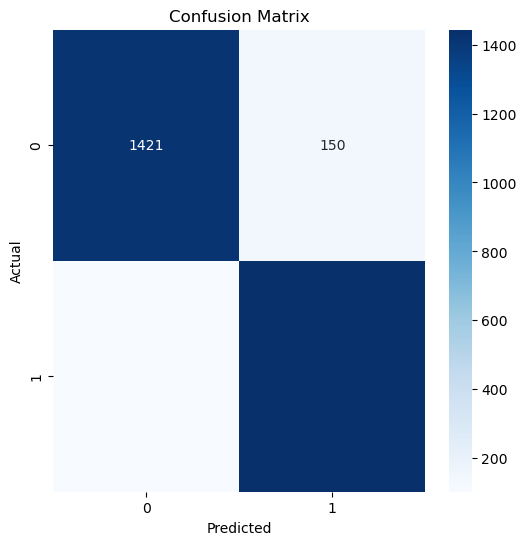

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the features from the CSV file (assuming features_df is already available or you can load it)
# features_df = pd.read_csv("D:/project/SIH/SAMPLE/CWT_Images/spectrogram_features.csv")

# Prepare the feature matrix (X) and target vector (y)
X = features_df.drop(columns=['class'])  # Dropping 'class' and 'image_path' columns
y = features_df['class']  # Target variable (class)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
import joblib 

# Save the trained model to a file
model_filename = "random_forest_model.pkl"
joblib.dump(rf_classifier, model_filename)
print(f"Model saved to {model_filename}")

Model saved to random_forest_model.pkl


## Testing of the Model using the Bird Sample

In [2]:
import numpy as np

# Load a NumPy file
data = np.load(r'D:\project\SIH\Wavelet_Classify\processed_segments_birds\bird56_segment_1.npy')

# Display the data
print(data)


[[ 0.04017591-0.0406636j   0.03713236+0.18288778j  0.11057941+0.02628835j
  ... -0.17297132-0.17408003j  0.12752111+0.15500818j
  -0.03388815-0.08233488j]]


[array(0.36728075-0.09913971j), array(0.5674752-0.11789964j), array(0.04004688-0.38999597j), array(-0.09384648+0.63492923j), array(0.34443248-0.07981093j), array(0.30509573-0.31038239j), array(0.25738591-0.2419264j), array(0.1700684+0.12070866j), array(0.21975749-0.2099971j), array(1.62395726-0.18258425j), array(0.51285994+0.54937571j), array(0.03167141+0.15866532j), array(0.09056816-0.29607629j), array(0.41967972+0.41252758j), array(-0.09877407-0.11712616j), array(-1.02589879-0.19499928j), array(0.07162307+0.2330407j), array(0.03466523+0.08247707j), array(0.09533503-0.23669362j), array(-0.09385255+0.19118825j), array(-0.05422248-0.06128906j), array(0.04423002-0.10526998j), array(-0.1142085-0.42380076j), array(-0.15923837-0.2114662j), array(-0.12162148-0.08963332j), array(0.12455829-0.38421952j), array(-0.18590683+0.08785341j), array(0.48965537+0.15680366j), array(0.18083004+0.3414438j), array(-0.11085007-0.43237719j), array(-0.43988193-0.4677122j), array(0.2062565+0.4439145j), array(0

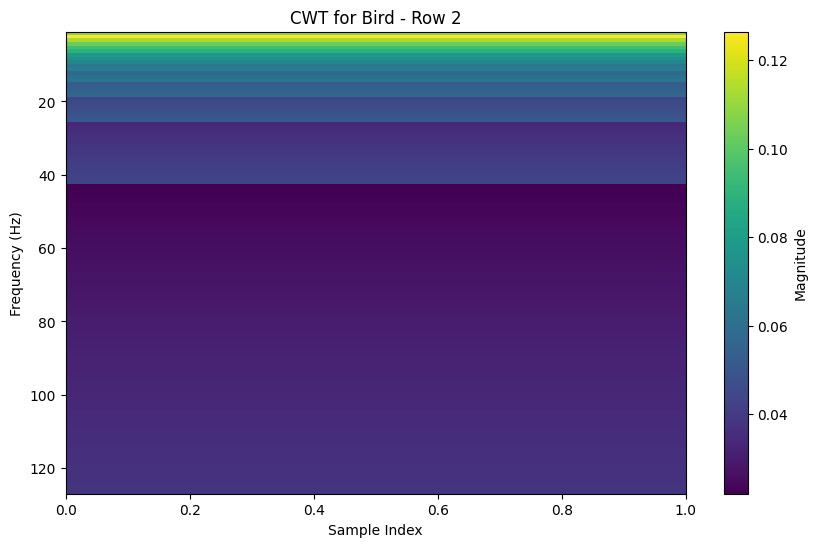

Images saved successfully!


In [ ]:
# Parameters for CWT
wavelet = 'cmor'  # Complex Morlet wavelet for time-frequency analysis
scales = np.arange(1, 128)  # Define scales for the wavelet transform

# Function to perform CWT on a single complex-valued radar segment
def perform_cwt(segment, scales, wavelet):
    """
    Perform Continuous Wavelet Transform (CWT) on a single segment.
    """
    segment = np.array(segment).flatten()  # Flatten in case of nested lists
    coefficients, frequencies = pywt.cwt(segment, scales, wavelet)
    return np.abs(coefficients)  # Magnitude of CWT coefficients

k = []
# Apply CWT and save each result as an image

serial_number = 2
label = 'bird'

# Load your NumPy data file
data = np.load(r'D:\Classification_Backend\Human\human_run_folder\human_run_51.npy', allow_pickle=True)  # Replace with your actual file path

# Assuming the data is structured with labels in a specific way
# For example, if the data is an array of tuples (value, label)
# You may need to adjust this based on your actual data structure
filtered_data = [segment for segment in data]  # Adjust indexing as needed

# Convert filtered data to numeric, drop non-numeric rows if necessary
filtered_data = [np.array(segment, dtype=complex) for segment in filtered_data]  # Adjust based on your data structure

print(filtered_data)
if filtered_data and 1 <= serial_number <= 14000:
    k.append(filtered_data[0])  # Append the first segment (adjust as needed)
    cwt_result = perform_cwt(k, scales, wavelet)
    # Save the image
    plt.figure(figsize=(10, 6))
    plt.imshow(
        cwt_result, extent=[0, cwt_result.shape[1], scales[-1], scales[0]],
        cmap='viridis', aspect='auto'
    )
    plt.colorbar(label='Magnitude')
    plt.title(f'CWT for h - Row {serial_number}')
    plt.xlabel('Sample Index')
    plt.ylabel('Frequency (Hz)')

    # Save the figure to the "Bird" folder
    folder = r'D:\project\SIH\Wavelet_Classify\bird'  # Define your folder path here
    os.makedirs(folder, exist_ok=True)  # Create folder if it doesn't exist
    image_path = os.path.join(folder, f"bird_{serial_number}.png")
    plt.savefig(image_path, bbox_inches='tight')
    plt.show()
    plt.close()
   
print("Images saved successfully!")


In [ ]:
# Load spectrogram image
def load_spectrogram_image(image_path):
    # Read image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image at {image_path} not found.")
    return image

# Extract statistical and frequency-based features
def extract_frequency_features(image):
    # Normalize pixel values
    normalized_image = image / 255.0

    # Project intensity along frequency (rows) to get power spectrum
    power_spectrum = np.sum(normalized_image, axis=1)

    # Compute frequency axis (Assume 0 to Nyquist frequency)
    num_rows, num_cols = image.shape
    frequencies = np.linspace(0, 0.5, num_rows)

    # Extract features
    features = {}

    # 1. Peak frequency
    peak_indices = find_peaks(power_spectrum, height=np.max(power_spectrum) * 0.1)[0]
    if len(peak_indices) > 0:
        peak_freqs = frequencies[peak_indices]
        features['mean_peak_frequency'] = np.mean(peak_freqs)
    else:
        features['mean_peak_frequency'] = 0

    # 2. Bandwidth (Variance of power spectrum)
    power_sum = np.sum(power_spectrum)
    normalized_spectrum = power_spectrum / power_sum
    spectral_variance = np.sum(normalized_spectrum * (frequencies - np.mean(frequencies)) ** 2)
    features['bandwidth'] = np.sqrt(spectral_variance)

    # 3. Spectral centroid
    spectral_centroid = np.sum(frequencies * power_spectrum) / np.sum(power_spectrum)
    features['spectral_centroid'] = spectral_centroid

    # 4. Spectral entropy
    features['spectral_entropy'] = entropy(power_spectrum + 1e-12)

    # 5. Energy distribution
    features['total_energy'] = np.sum(power_spectrum)

    return features

# Visualize the spectrogram
def plot_loaded_spectrogram(image, title="Spectrogram"):
    plt.figure(figsize=(10, 6))
    plt.imshow(image, aspect='auto', cmap='jet', origin='lower')
    plt.colorbar(label='Intensity')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

# Get all image paths from a directory
def get_image_paths(directory_path):
    return [os.path.join(directory_path, filename) for filename in os.listdir(directory_path) if filename.endswith('.png')]

if __name__ == "__main__":
    # Initialize an empty list to store the feature dictionaries
    features_list = []

    # Image path for testing
    image_path = r"D:\project\SIH\Wavelet_Classify\bird\bird_2.png"

    # Load the spectrogram image
    spectrogram_image = load_spectrogram_image(image_path)

    # Extract features from the spectrogram image
    frequency_features = extract_frequency_features(spectrogram_image)

    # Add the features to the list
    features_list.append(frequency_features)

    # Convert the list of features into a DataFrame
    features_df = pd.DataFrame(features_list)

    # Display the first few rows of the DataFrame
    print(features_df.head())


   mean_peak_frequency  bandwidth  spectral_centroid  spectral_entropy  \
0             0.247116    0.16271           0.262046          6.229461   

   total_energy  
0      216988.8  


In [ ]:
# Load the trained model
model_filename = "random_forest_model.pkl"
rf_classifier = joblib.load(model_filename)


new_data = features_df

# Predict using the loaded model
predictions = rf_classifier.predict(new_data)

# Output the predictions
print("Predictions:", predictions)


Predictions: [0]


## Testing of the Model using the Drone Sample

### Step 1: Load Radar Segment
- Load .npy file containing radar signal segments
- Example file: drone7_segment_2.npy

### Step 2: Preprocess Segment
- Extract and flatten the segment data
- Ensure data is in complex format (needed for wavelet transform)

### Step 3: Apply CWT
- Use Complex Morlet wavelet (cmor)
- Define a range of scales (1 to 127)
- Apply pywt.cwt() to get CWT coefficients
- Take the magnitude of the coefficients

### Step 4: Save CWT Image
- Visualize CWT result using matplotlib
- Save the image as .png in a folder (e.g., bird/)

### Step 5: Load Image
- Load the saved image using OpenCV in grayscale

### Step 6: Extract Features
- Normalize image pixel values
- Compute Power Spectrum by summing pixel values along rows (frequency)
- Extract 5 key features:
  1. Mean Peak Frequency
  2. Bandwidth (variance of spectrum)
  3. Spectral Centroid
  4. Spectral Entropy
  5. Total Energy

### Step 7: Create Features DataFrame
- Store extracted features in a Python dictionary
- Convert it to a pandas.DataFrame

### Step 8: Load Trained Model
- Load pre-trained Random Forest model (random_forest_model.pkl)

### Step 9: Make Predictions
- Predict class using extracted features from the spectrogram
- Print the predicted label (e.g., bird, drone, etc.)

c:\Users\ADMIN\anaconda3\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


[[0.05975799 0.23469197 0.16975415 ... 0.06414492 0.01590047 0.06185283]
 [0.15125773 0.17924976 0.14432236 ... 0.04113013 0.0497245  0.00668901]
 [0.2713149  0.34134174 0.40372148 ... 0.24251433 0.11267426 0.05405607]
 ...
 [2.28803342 2.08029915 2.00126306 ... 0.3817289  0.51250162 0.37852783]
 [2.77748507 2.02700621 1.79634185 ... 0.43518815 0.452068   0.45653053]
 [0.87988984 3.11341375 1.35411522 ... 0.38279885 0.52659254 0.40891963]]


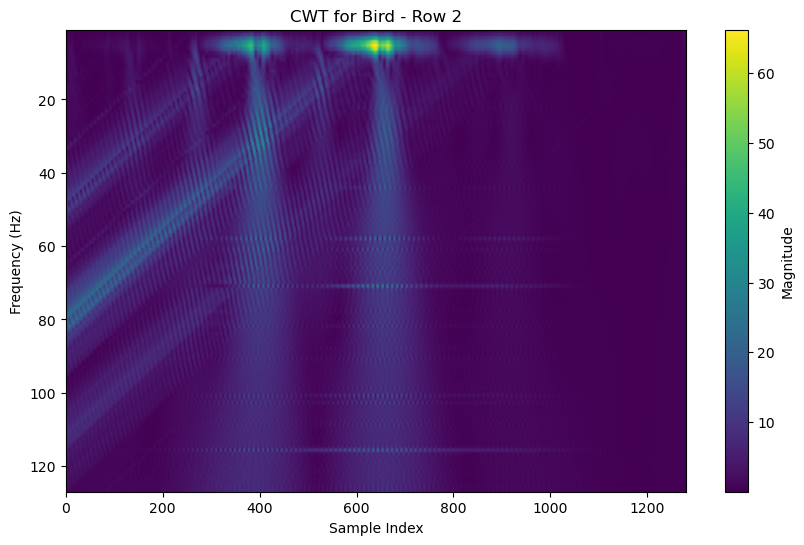

Images saved successfully!


In [ ]:
# Parameters for CWT
wavelet = 'cmor'  # Complex Morlet wavelet for time-frequency analysis
scales = np.arange(1, 128)  # Define scales for the wavelet transform

# Function to perform CWT on a single complex-valued radar segment
def perform_cwt(segment, scales, wavelet):
    """
    Perform Continuous Wavelet Transform (CWT) on a single segment.
    """
    segment = np.array(segment).flatten()  # Flatten in case of nested lists
    coefficients, frequencies = pywt.cwt(segment, scales, wavelet)
    return np.abs(coefficients)  # Magnitude of CWT coefficients

k = []
# Apply CWT and save each result as an image

serial_number = 2
label = 'bird'

# Load your NumPy data file
data = np.load(r'D:\project\SIH\Wavelet_Classify\processed_segments_drones\drone7_segment_2.npy', allow_pickle=True)  # Replace with your actual file path

# Assuming the data is structured with labels in a specific way
# For example, if the data is an array of tuples (value, label)
# You may need to adjust this based on your actual data structure
filtered_data = [segment for segment in data]  # Adjust indexing as needed

# Convert filtered data to numeric, drop non-numeric rows if necessary
filtered_data = [np.array(segment, dtype=complex) for segment in filtered_data]  # Adjust based on your data structure

if filtered_data and 1 <= serial_number <= 14000:
    k.append(filtered_data[0])  # Append the first segment (adjust as needed)
    cwt_result = perform_cwt(k, scales, wavelet)
    print(cwt_result)
    # Save the image
    plt.figure(figsize=(10, 6))
    plt.imshow(
        cwt_result, extent=[0, cwt_result.shape[1], scales[-1], scales[0]],
        cmap='viridis', aspect='auto'
    )
    plt.colorbar(label='Magnitude')
    plt.title(f'CWT for Bird - Row {serial_number}')
    plt.xlabel('Sample Index')
    plt.ylabel('Frequency (Hz)')

    # Save the figure to the "Bird" folder
    folder = r'D:\project\SIH\Wavelet_Classify\bird'  # Define your folder path here
    os.makedirs(folder, exist_ok=True)  # Create folder if it doesn't exist
    image_path = os.path.join(folder, f"drone_{serial_number}.png")
    plt.savefig(image_path, bbox_inches='tight')
    plt.show()
    plt.close()
   
print("Images saved successfully!")


In [ ]:
# Load spectrogram image
def load_spectrogram_image(image_path):
    # Read image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image at {image_path} not found.")
    return image

# Extract statistical and frequency-based features
def extract_frequency_features(image):
    # Normalize pixel values
    normalized_image = image / 255.0

    # Project intensity along frequency (rows) to get power spectrum
    power_spectrum = np.sum(normalized_image, axis=1)

    # Compute frequency axis (Assume 0 to Nyquist frequency)
    num_rows, num_cols = image.shape
    frequencies = np.linspace(0, 0.5, num_rows)

    # Extract features
    features = {}

    # 1. Peak frequency
    peak_indices = find_peaks(power_spectrum, height=np.max(power_spectrum) * 0.1)[0]
    if len(peak_indices) > 0:
        peak_freqs = frequencies[peak_indices]
        features['mean_peak_frequency'] = np.mean(peak_freqs)
    else:
        features['mean_peak_frequency'] = 0

    # 2. Bandwidth (Variance of power spectrum)
    power_sum = np.sum(power_spectrum)
    normalized_spectrum = power_spectrum / power_sum
    spectral_variance = np.sum(normalized_spectrum * (frequencies - np.mean(frequencies)) ** 2)
    features['bandwidth'] = np.sqrt(spectral_variance)

    # 3. Spectral centroid
    spectral_centroid = np.sum(frequencies * power_spectrum) / np.sum(power_spectrum)
    features['spectral_centroid'] = spectral_centroid

    # 4. Spectral entropy
    features['spectral_entropy'] = entropy(power_spectrum + 1e-12)

    # 5. Energy distribution
    features['total_energy'] = np.sum(power_spectrum)

    return features

# Visualize the spectrogram
def plot_loaded_spectrogram(image, title="Spectrogram"):
    plt.figure(figsize=(10, 6))
    plt.imshow(image, aspect='auto', cmap='jet', origin='lower')
    plt.colorbar(label='Intensity')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

# Get all image paths from a directory
def get_image_paths(directory_path):
    return [os.path.join(directory_path, filename) for filename in os.listdir(directory_path) if filename.endswith('.png')]

if __name__ == "__main__":
    # Initialize an empty list to store the feature dictionaries
    features_list = []

    # Image path for testing
    image_path = r"D:\project\SIH\Wavelet_Classify\bird\drone_2.png"

    # Load the spectrogram image
    spectrogram_image = load_spectrogram_image(image_path)

    # Extract features from the spectrogram image
    frequency_features = extract_frequency_features(spectrogram_image)

    # Add the features to the list
    features_list.append(frequency_features)

    # Convert the list of features into a DataFrame
    features_df = pd.DataFrame(features_list)

    # Display the first few rows of the DataFrame
    print(features_df.head())


   mean_peak_frequency  bandwidth  spectral_centroid  spectral_entropy  \
0             0.249461   0.167513           0.260495          6.191067   

    total_energy  
0  190448.909804  


In [ ]:
# Load the trained model
model_filename = "random_forest_model.pkl"
rf_classifier = joblib.load(model_filename)


new_data = features_df

# Predict using the loaded model
predictions = rf_classifier.predict(new_data)

# Output the predictions
print("Predictions:", predictions)


Predictions: [1]
